In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

In [ ]:
def deutsch_function(case):
    """
    Return a 2-qubit QuantumCircuit implementing one of the four possible f(x).
    case: 1..4
    Mapping (common convention):
     1: f(x)=0 (constant 0)
     2: f(x)=x (balanced)
     3: f(x)=x ⊕ 1 (balanced)
     4: f(x)=1 (constant 1)
    """
    if case not in [1,2,3,4]:
        raise ValueError("case must be 1,2,3,4")
    f = QuantumCircuit(2, name=f"f{case}")
    # Build using CX and X as in your original code
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

In [ ]:
def compile_circuit(function):
    """
    Build the full Deutsch circuit using the provided function (QuantumCircuit or Gate).
    Returns a QuantumCircuit with 1 classical bit (for n=1).
    """
    # get number of input qubits (n) from the function's num_qubits
    num_qubits = function.num_qubits
    n = num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    # prepare |0>|1>
    qc.x(n)                       # target (ancilla) = |1>
    qc.h(list(range(n + 1)))      # H on input and target
    qc.barrier()
    # convert provided function to a gate and append across all qubits
    gate = function.to_gate()
    qc.append(gate, list(range(n + 1)))
    qc.barrier()
    qc.h(list(range(n)))
    qc.measure(list(range(n)), list(range(n)))
    return qc

def deutsch_algorithm(function):
    """
    Run the Deutsch circuit once and return 'constant' or 'balanced'.
    Uses shots=1 to run the circuit a single time.
    """
    qc = compile_circuit(function)
    simulator = Aer.get_backend('aer_simulator')
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1)
    result = job.result()
    counts = result.get_counts()   # with shots=1 this returns a single key
    output_bit = max(counts, key=counts.get)  # '0' or '1' for n=1
    return 'constant' if output_bit == '0' else 'balanced'

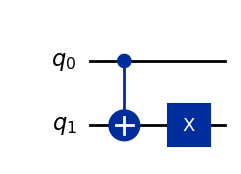

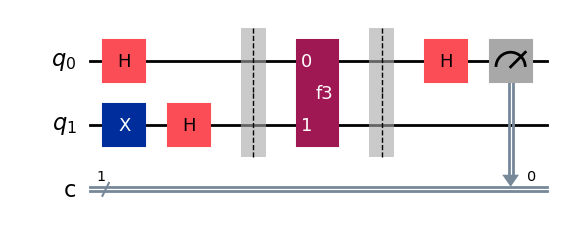

Result for case 3: balanced


In [ ]:
f = deutsch_function(3)

display(f.draw('mpl'))  

full = compile_circuit(f)
display(full.draw('mpl'))

outcome = deutsch_algorithm(f)
print(f"Result for case 3: {outcome}")